You can only use the libraries that have been provided to you. No other library use is allowed.

In [1]:
# No other libraries other than the given libraries are allowed.
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
terminal_states_4 = [5, 7, 11, 12] # Terminal states for 4 by 4 frozen lake environment
terminal_states_8 = [19, 29, 35, 41, 42, 46, 49, 52, 54, 59] # Terminal states for 8 by 8 frozen lake environment


actions = {
"LEFT" : 0,
"DOWN" : 1,
"RIGHT" : 2,
"UP" : 3
}

In [3]:
class RLTables:

    def __init__(self, map_size):
        self.map_size = map_size
        self.total_states = map_size * map_size
        self.goal_state = self.total_states - 1

    def initialize_value_table(self):

        self.value_table = np.zeros(self.total_states)



    def initialize_q_table(self):

        self.q_table = np.zeros((self.total_states, 4))





    def initialize_random_policy(self):


        self.policy = np.random.randint(0,3,self.total_states)

        if self.map_size == 4:
            self.terminal_states = terminal_states_4
        if self.map_size == 8:
            self.terminal_states = terminal_states_8

        for state in self.terminal_states: # Change this when you are solving for the 8 by 8 frozen lake environment.
            self.policy[state] = -1

        self.policy[self.goal_state] = -2


    def print_all_tables(self):

        print("Value Table")
        print(self.value_table)
        print("\nQ-Table")
        print(self.q_table)
        print("Policy")
        print(self.policy)
        print("Reward")
        print(self.reward)

    def get_tables(self):
        return self.policy, self.value_table, self.q_table, self.reward


    def initialize_reward(self):
        self.reward = np.zeros(self.total_states)
        self.reward[self.goal_state] = 1



    def initialize_all_tables(self):
        self.initialize_random_policy()
        self.initialize_value_table()
        self.initialize_q_table()
        self.initialize_reward()

In [4]:
class Plot(RLTables):
    def __init__(self, map_size):
        super().__init__(map_size)
        self.directions = {-2: "G", -1: " ", 0: "←", 1: "↓", 2: "→", 3: "↑"}

    def convert_policy_to_arrows(self):

        def replace_with_direction(num):
            return self.directions[num]

        vectorized_replace = np.vectorize(replace_with_direction)

        result_array = vectorized_replace(self.policy)

        return result_array

    def show_policy_table(self):
        arrow_based_policy = self.convert_policy_to_arrows()

        self.data = list(arrow_based_policy.reshape(self.map_size, self.map_size))

        # Create a figure and axis
        _, ax = plt.subplots()
        colors = plt.cm.BuPu(np.full((self.map_size, self.map_size), 0.1))


        self.table = ax.table(cellText=self.data, loc='center', cellLoc='center', colLabels=None, cellColours=colors)

        if self.map_size == 4:
                self.table.scale(0.6, 4)
        elif self.map_size == 8:
                self.table.scale(0.5, 2)

        # Hide axis
        ax.axis('off')

        # Customize cell properties (optional)
        self.table.auto_set_font_size(False)
        self.table.set_fontsize(25)
        self.table.scale(1.5, 1.5)  # Adjust cell size as needed
        ax.axis('off')  # Turn off the axis

    def show_value_table(self):



        self.show_policy_table()

        if self.map_size == 8:
            self.table.set_fontsize(10)

        for i in range(self.map_size):
                    for j in range(self.map_size):

                            cell_text = self.data[i][j]

                            if cell_text == " " or cell_text == "G":
                                    continue

                            cell = self.table[i, j]

                            number_text = str(round( self.value_table[self.map_size*i + j], 2))
                            full_text = cell_text + '\n' + number_text
                            cell.get_text().set_text(full_text)


    def show_q_table(self):

        self.show_policy_table()

        if self.map_size == 4:
            self.table.set_fontsize(10)
        elif self.map_size == 8:
            self.table.set_fontsize(5)



        for i in range(self.map_size):
                        for j in range(self.map_size):

                                cell_text = self.data[i][j]

                                if cell_text == " " or cell_text == "G":
                                        continue


                                cell = self.table[i, j]

                                number_text2 = str(round( self.q_table[self.map_size*i + j][0], 2))
                                number_text4 = str(round( self.q_table[self.map_size*i + j][1], 2))
                                number_text3 = str(round( self.q_table[self.map_size*i + j][2], 2))
                                number_text1 = str(round( self.q_table[self.map_size*i + j][3], 2))

                                full_text = number_text1 + "\n\n" + number_text2 + "  " + cell_text + "  " + number_text3 + "\n\n" + number_text4

                                cell.get_text().set_text(full_text)


    def show_all_tables(self):
        self.show_policy_table()
        self.show_value_table()
        self.show_q_table()


The RLTables class initializes all the tables you will need. You need to find the correct policy, value table and qtable. The Plot Class inherits from RLTables. It makes for an easy visualization tool that you can use to visualize these tables.

In [5]:
# Here I have showed a basic usage of the classes.

rl = RLTables(map_size=4) # You can change map_size to 8 when solving for the 8 by 9 environment.
rl.initialize_all_tables()
rl.print_all_tables()

Value Table
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Q-Table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Policy
[ 1  0  0  2  0 -1  1 -1  0  1  1 -1 -1  2  1 -2]
Reward
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


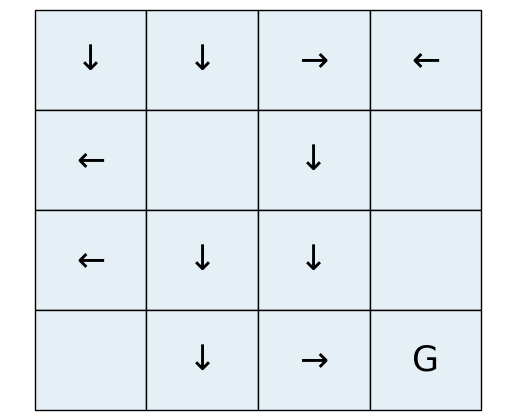

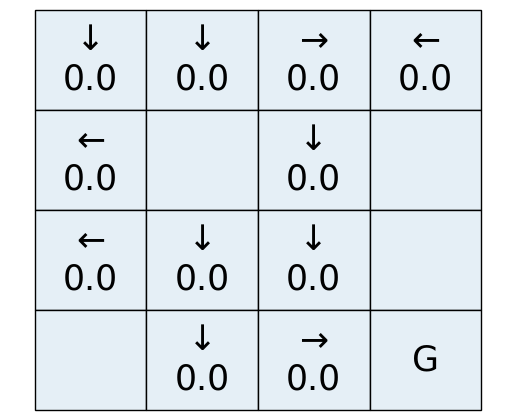

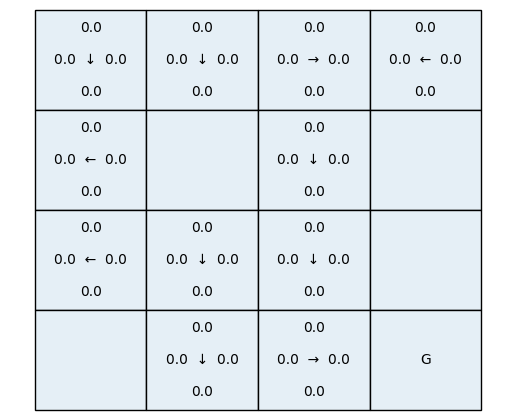

In [6]:
plot = Plot(map_size=4)
plot.initialize_all_tables()
plot.show_all_tables()

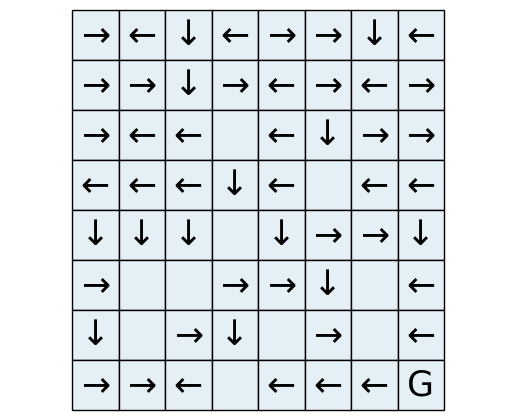

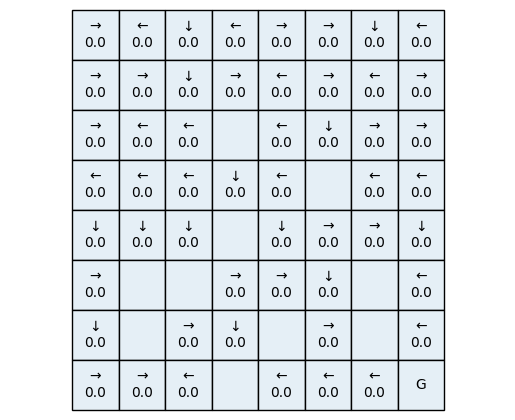

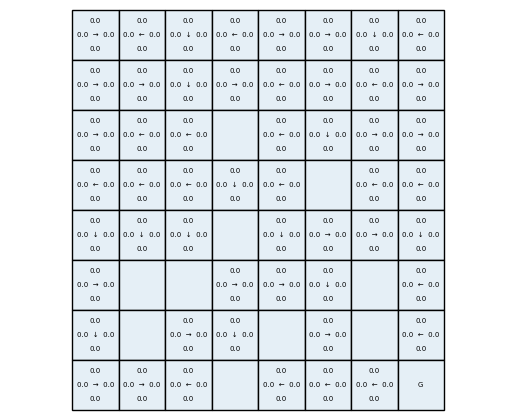

In [7]:
# For an 8 by 8 environment.
plot = Plot(map_size=8)
plot.initialize_all_tables()
plot.show_all_tables()

The Policy is randomly initialized. There are no algorithms implemented for this and so value table and qtable are initialized to 0.

https://gymnasium.farama.org/environments/toy_text/frozen_lake/

The above link contains all you need to know about the environment.

Good Luck for the assignment! If you want any help, you can ask for help from the instructor or Mahen Mughal on Slack.

**a)** Find the optimal policy, value table and q table for both frozen lake 4 by 4 environments using  

    i) Policy Iteration  

**b)** Perform part a on 8 by 8 frozen lake environment  

**c)** Find success rate on 100000 iterations for the optimal policy for both 4 by 4 environment and 8 by 8 environment.  

**d)** Do you think this should be the success rate for the 8 by 8 environment. If not, why not?


In [8]:
def state_from_coordinates(state, map_size): #state = (2,1) should return 9 if map size 4
    return (map_size * state[0] + state[1])


def get_states(action,state,map_size): #given an action and state and map size, find the next states

    reachable_states = []

    col = state % map_size
    row = (state - col) // map_size

    if (action == 0): #state on the left, up and down : action left

        reachable_states = [(row, col - 1),(row - 1, col),(row + 1, col)]

    if(action == 1): #action : down. get the state below right and left

        reachable_states = [(row + 1,col),(row, col - 1),(row, col + 1)]

    if(action == 2): #action is right, get state on the right up and down

        reachable_states = [(row, col + 1),(row+1, col),(row - 1, col)]

    if(action == 3): #action is up, get the state up, right and left

        reachable_states = [(row - 1, col),(row, col + 1),(row, col - 1)]


    #if the action takes out of the grid replace that unwanted state with the current state

    next_states = []

    for i in reachable_states:

        if(i[0] < 0 or i[0] > map_size - 1 or i[1] < 0 or i[1] > map_size - 1):
            next_states.append(state)

        else:
            next_states.append(state_from_coordinates(i, map_size))



    return next_states


In [9]:
env_4 = RLTables(4)
env_4.initialize_all_tables()
env_4.print_all_tables()

Value Table
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Q-Table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Policy
[ 2  1  2  1  2 -1  1 -1  1  0  0 -1 -1  1  1 -2]
Reward
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
def policy_evaluation(pi_s, epsilon, map_size,gamma): #get the converged values  of each state under a fixed policy
    
    total_states = map_size*map_size
    rewards = np.zeros(map_size*map_size)
    rewards[map_size*map_size - 1] = 1
    V_s_next = np.zeros(map_size*map_size)
    V_s_prev = np.zeros(map_size*map_size)
    
    terminal_states = []

    if(map_size == 4):
        terminal_states = terminal_states_4
    if(map_size == 8):
        terminal_states = terminal_states_8



    

    while True:

        for state in range(map_size*map_size):

            if state in terminal_states or state == map_size*map_size - 1:
                continue
            
            q_values_s = []

            for action in range(4):

                expectation_action_state = 0 
                
                reachable_states = get_states(action, state, map_size)

                for reachable_state in reachable_states:

                    expectation_action_state += 1/3 * (rewards[reachable_state] + gamma*V_s_prev[reachable_state])
                
                q_values_s.append(expectation_action_state)

            V_s_next[state] = max(q_values_s)


        delta = np.max(V_s_next) - np.max(V_s_prev)

        if(delta > 0 and delta < epsilon):
            
            break


        temp = V_s_prev
        V_s_prev = V_s_next
        V_s_next = temp



    return V_s_next

            
def policy_improvement(policies, value_function, map_size,gamma): #given a value function of a certain policy, find out the new policies

    total_states = map_size*map_size
    rewards = np.zeros(total_states)
    rewards[total_states - 1] = 1
    V_s = value_function
    q_table = np.zeros((total_states, map_size))

    for state in range(total_states):

        if state in terminal_states_4 or state == total_states - 1:
            continue

        for action in range(4):

            reachable_states = get_states(action, state, map_size)

            for reachable_state in reachable_states:

                q_table[state][action] += 1/3 * (rewards[reachable_state] + gamma*value_function[reachable_state])

            
    derived_policies = np.zeros(total_states)

    for i in range(total_states):
        derived_policies[i] = np.argmax(q_table[i])

    is_stable = True

    #checking if the policies are stable

    for i in range(total_states):
        if(derived_policies[i] != policies[i]):
            is_stable = False
            break


    

    return derived_policies, is_stable


def policy_iteration(epsilon, map_size,gamma):

    arbitrary_policy = np.random.randint(0,4, map_size*map_size)
    print(arbitrary_policy)
    value_under_policy = policy_evaluation(arbitrary_policy, epsilon, map_size,gamma)

    updated_policy, is_stable = policy_improvement(arbitrary_policy, value_under_policy, map_size,gamma)

    while(not is_stable):

        value_under_policy = policy_evaluation(updated_policy, epsilon, map_size,gamma)
        updated_policy,is_stable = policy_improvement(updated_policy, value_under_policy,map_size,gamma)


    return updated_policy, value_under_policy


optimal_policies_four, optimal_values_four = policy_iteration(0.0000000001, 4,0.95)


print(optimal_policies_four)
print(optimal_values_four)



[1 3 1 1 3 0 1 1 0 0 0 1 3 1 2 1]
[0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]
[0.18047157 0.15475672 0.15347714 0.13254843 0.20896709 0.
 0.17643079 0.         0.2704574  0.37465152 0.40367271 0.
 0.         0.50897995 0.72367364 0.        ]


In [11]:
env_4.policy = optimal_policies_four
env_4.value_table = optimal_values_four



### Success on 4 by 4

In [12]:
#testing
env = gym.make("FrozenLake-v1", is_slippery=True,map_name = '4x4')
# env.action_space.seed(42)

observation, info = env.reset()

failure_count = 0
success_count = 0

for i in range(100000):
    # print(i)
    done = False
    while not done:
        observation, reward, terminated, truncated, info = env.step(optimal_policies_four[observation])

        # print("Observation:", observation)
        # print("Reward:", reward)
        # print("Terminated:", terminated)
        # print("Truncated:", truncated)
        # print("Info:", info)

        if observation == 15:
            success_count += 1
            # print(i)


        if terminated or truncated:
            # print(failure_count)
            observation, info = env.reset()
            done = True
            # failure_count += 1

env.close()



print(f"Success Percentage on 4 by 4 grid is : {success_count/100000 * 100}%")

Success Percentage on 4 by 4 grid is : 72.993%


In [13]:
env_8 = RLTables(8)
env_8.initialize_all_tables()
env_8.print_all_tables()

Value Table
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Q-Table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0

In [14]:
optimal_policies_eight, optimal_values_eight = policy_iteration(0.0000000001, 8,0.95)


print(optimal_policies_eight)
print(optimal_values_eight)


[3 3 1 1 2 1 1 1 3 0 1 0 1 0 0 0 2 0 1 1 2 2 0 1 1 2 3 2 1 1 3 3 2 3 0 0 1
 2 1 2 1 3 1 0 1 0 3 1 2 3 1 1 0 2 3 3 1 0 2 1 3 0 0 0]
[3. 2. 2. 2. 2. 0. 2. 0. 3. 3. 3. 0. 0. 2. 2. 1. 3. 3. 0. 3. 2. 3. 2. 1.
 3. 3. 3. 1. 0. 2. 2. 1. 3. 3. 0. 2. 2. 1. 3. 2. 0. 0. 2. 1. 3. 0. 3. 2.
 0. 1. 1. 0. 2. 0. 1. 2. 0. 1. 0. 3. 1. 1. 1. 0.]
[0.04825019 0.05586865 0.06811766 0.08391801 0.10246783 0.11983687
 0.13396309 0.13978561 0.04666177 0.052441   0.06307274 0.07861841
 0.10127791 0.12463226 0.14929265 0.16185702 0.04221616 0.04443625
 0.04566786 0.         0.09272491 0.12444605 0.17563035 0.19997777
 0.03688352 0.0373746  0.03670529 0.03286899 0.06709153 0.
 0.20535173 0.25590064 0.02997277 0.02779457 0.02042496 0.
 0.0862741  0.13289287 0.21694818 0.3468549  0.02163706 0.
 0.         0.02610794 0.07246012 0.11643941 0.         0.49257573
 0.01671772 0.         0.00542678 0.00998599 0.         0.16235041
 0.         0.71607168 0.01443803 0.01000476 0.0071512  0.
 0.18362624 0.39624609 0.67143111 0

### Success on 8 by 8

In [15]:
#testing
env = gym.make("FrozenLake-v1", is_slippery=True,map_name = '8x8')
# env.action_space.seed(42)

observation, info = env.reset()

failure_count = 0
success_count = 0

for i in range(100000):
    # print(i)
    done = False
    while not done:
        observation, reward, terminated, truncated, info = env.step(optimal_policies_eight[observation])

        # print("Observation:", observation)
        # print("Reward:", reward)
        # print("Terminated:", terminated)
        # print("Truncated:", truncated)
        # print("Info:", info)

        if observation == 15:
            success_count += 1
            # print(i)


        if terminated or truncated:
            # print(failure_count)
            observation, info = env.reset()
            done = True
            # failure_count += 1

env.close()



print(f"Success Percentage on 8 by 8 grid is : {success_count/100000 * 100}%")

Success Percentage on 8 by 8 grid is : 73.60799999999999%


### Visualization 4 by 4

In [16]:
plot_4 = Plot(4)
plot_4.initialize_all_tables()

In [17]:
plot_4.policy = optimal_policies_four
plot_4.value_table = optimal_values_four

for i in range(16):
    if i == 15:
        plot_4.policy[i] = -2
    
    if i in terminal_states_4:
        plot_4.policy[i] = -1


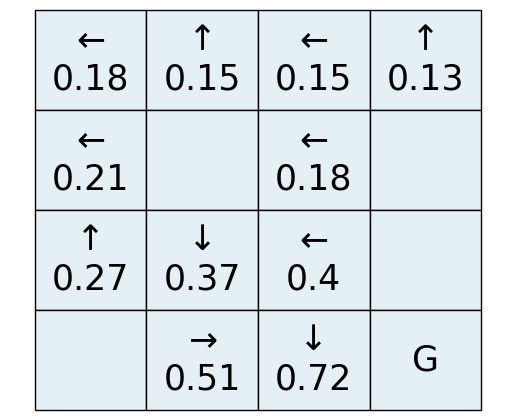

In [18]:

plot_4.show_value_table()

### Visualization 8 by 8

In [19]:
plot_8 = Plot(8)
plot_8.initialize_all_tables()
plot_8.policy = optimal_policies_eight
plot_8.value_table = optimal_values_eight

for i in range(64):
    if i == 63:
        plot_8.policy[i] = -2
    
    if i in terminal_states_8:
        plot_8.policy[i] = -1


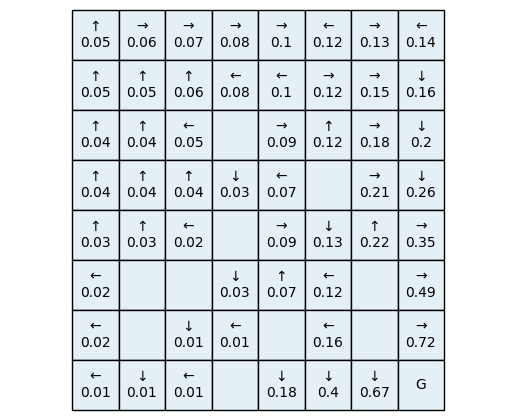

In [20]:
plot_8.show_value_table()

### Part D

yes because we have found the optimal policies in the 4 by 4 as well as the 8 by 8 case. Also given the stochastic nature of the problem we have come up with the best decisions thus the success rate of 4 by 4 should be pretty close to the success rate of 8 by 8 which we have seen above